# Depth Estimation and Conversion Script

This Jupyter notebook provides code to perform depth estimation on images using the **Hugging Face `transformers` pipeline**. The main functionality includes converting single images or a batch of images into depth maps using a pre-trained model (depth-anything). The depth maps are then normalized and saved as output images.

## Overview

The script consists of two main functions:

1. **`convert_images_to_depth(input_dir_path, output_dir_path, num_images=None)`**: 
   This function processes multiple images from an input directory, estimates their depth maps, and saves the results in the specified output directory.
   
2. **`convert_single_image_to_depth(input_file_path, output_file_path)`**: 
   This function processes a single image, estimates its depth map, and displays the original and depth images side by side.

Both functions use the **`depth-estimation` task** from the Hugging Face `transformers` library, specifically using the **LiheYoung/depth-anything-small-hf** model.

## Requirements

Before running this notebook, ensure that the following libraries are installed:

- `transformers`
- `torch`
- `numpy`
- `matplotlib`
- `Pillow`
- `opencv-python`
- `tqdm`

Install them using:

```bash
pip install transformers torch numpy matplotlib Pillow opencv-python tqdm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from pathlib import Path
from tqdm import tqdm

from transformers import pipeline

def convert_images_to_depth(input_dir_path, output_dir_path, num_images=None):
    pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

    input_dir = Path(input_dir_path)
    output_dir = Path(output_dir_path)

    extensions = ['*.png', '*.jpg', '*.jpeg']
    image_files = sorted([f for ext in extensions for f in input_dir.rglob(ext)])
    tqdm.write(f"Found {len(image_files)} images")

    # Process only the first num_images images
    if num_images is not None:
        image_files = image_files[:num_images]

    for input_path in tqdm(image_files, desc="Processing images"):
        tqdm.write(f"Processing {input_path}")
        image = Image.open(input_path)
        depth = pipe(image)["depth"]
        depth = np.array(depth)
        
        normalized_depth = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        depth_rgba = cv2.merge([normalized_depth])

        output_path = output_dir / "out.png"
        output_path.parent.mkdir(parents=True, exist_ok=True)

        cv2.imwrite(output_path, depth_rgba)
        plt.imshow(depth_rgba)

    print("Done")
        
def convert_single_image_to_depth(input_file_path, output_file_path):
    pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

    input_path = Path(input_file_path)
    output_path = Path(output_file_path)

    tqdm.write(f"Processing {input_path}")
    image = Image.open(input_path)
    depth = pipe(image)["depth"]
    depth = np.array(depth)
    
    normalized_depth = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    depth_rgba = cv2.merge([normalized_depth])

    # output_path.parent.mkdir(parents=True, exist_ok=True)

    # cv2.imwrite(output_path, depth_rgba)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create 2 subplots side by side

    # Plot the original image in the first subplot
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Plot the depth image in the second subplot
    axs[1].imshow(depth_rgba, cmap='gray')
    axs[1].set_title('Depth Image')
    axs[1].axis('off')

    plt.show()
    
    cv2.imwrite(output_path, depth_rgba)

    print("Done")
    return depth_rgba

Processing /home/vr/Master_Bharathi/code/TransVOD/datasets/data_utils/DeformableDETR-Page-19.png


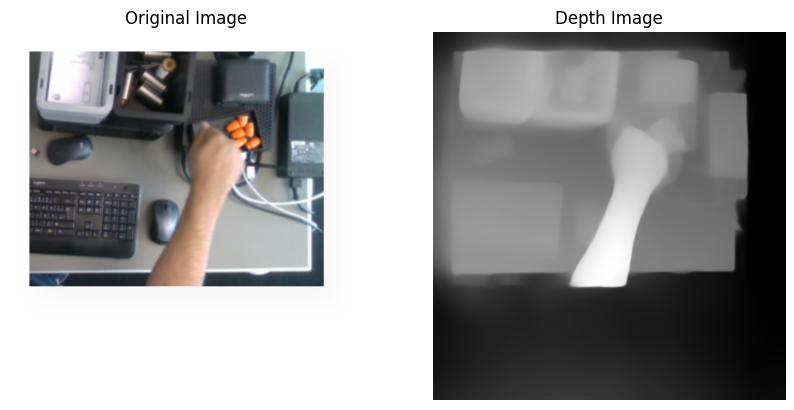

Done


In [5]:
depth_rgba = convert_single_image_to_depth("input.png", "output.png")

In [ ]:
# Show N number of images from COCO dataset

from utils import *

coco_path = '/train.json'
img_path = 'image_folder_path/'
load_coco_clips(coco_path, img_path,to_show=10)